In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import tensorflow as tf
import scikitplot as skplt
import matplotlib.pyplot as plt
from tensorflow.keras.metrics import FalseNegatives, TrueNegatives, TruePositives, FalsePositives
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from tensorflow.keras.layers import Embedding, LSTM, Input
from tensorflow.keras.layers import Dense, Dropout, Conv1D, MaxPool1D, BatchNormalization
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/DataAnalytics/master/dataset/Malware%20Analysis%20Datasets%20API%20Call%20Sequences/dynamic_api_call_sequence_per_malware_100_0_306.csv")

In [3]:
data.head()

,hash,t_0,t_1,t_2,t_3,t_4,t_5,t_6,t_7,t_8,...,t_91,t_92,t_93,t_94,t_95,t_96,t_97,t_98,t_99,malware
0,071e8c3f8922e186e57548cd4c703a5d,112,274,158,215,274,158,215,298,76,...,71,297,135,171,215,35,208,56,71,1
1,33f8e6d08a6aae939f25a8e0d63dd523,82,208,187,208,172,117,172,117,172,...,81,240,117,71,297,135,171,215,35,1
2,b68abd064e975e1c6d5f25e748663076,16,110,240,117,240,117,240,117,240,...,65,112,123,65,112,123,65,113,112,1
3,72049be7bd30ea61297ea624ae198067,82,208,187,208,172,117,172,117,172,...,208,302,208,302,187,208,302,228,302,1
4,c9b3700a77facf29172f32df6bc77f48,82,240,117,240,117,240,117,240,117,...,209,260,40,209,260,141,260,141,260,1


In [4]:
used_data = data.drop(['hash', 'malware'], axis=1)
used_data.head()

,t_0,t_1,t_2,t_3,t_4,t_5,t_6,t_7,t_8,t_9,...,t_90,t_91,t_92,t_93,t_94,t_95,t_96,t_97,t_98,t_99
0,112,274,158,215,274,158,215,298,76,208,...,117,71,297,135,171,215,35,208,56,71
1,82,208,187,208,172,117,172,117,172,117,...,60,81,240,117,71,297,135,171,215,35
2,16,110,240,117,240,117,240,117,240,117,...,123,65,112,123,65,112,123,65,113,112
3,82,208,187,208,172,117,172,117,172,117,...,215,208,302,208,302,187,208,302,228,302
4,82,240,117,240,117,240,117,240,117,172,...,40,209,260,40,209,260,141,260,141,260


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='malware', ylabel='count'>

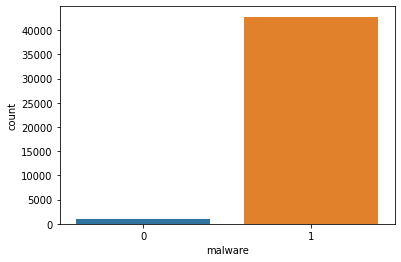

In [5]:
sns.countplot(data['malware'])

In [6]:
X_train, X_test, y_train, y_test = train_test_split(used_data, data['malware'], test_size=0.25, shuffle=True, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, shuffle=True, random_state=42)

In [7]:
ros = RandomOverSampler(random_state=0)
X_os, y_os = ros.fit_resample(X_train, y_train)

In [8]:
rus = RandomUnderSampler(random_state=0)
X_us, y_us = rus.fit_resample(X_train, y_train)

In [9]:
class Metrics(tf.keras.callbacks.Callback):
    
    def __init__(self, valid_data):
        super(Metrics, self).__init__()
        self.valid_data = valid_data
        
    def on_train_begin(self, logs={}):
        self._data = []
    
    def print_classification_report(self, epoch):
        if epoch%10 == 0:
            X_val, y_val = self.valid_data[0], self.valid_data[1]
            y_predict = self.model.predict(X_val)
            y_predict = np.array([1 if x>0.5 else 0 for x in y_predict])
            print(f'\n epoch {epoch+1} classification report:\n{classification_report(np.array(y_val), y_predict)}\n') 

    
    def on_epoch_end(self, epoch, logs=None):
        self.print_classification_report(epoch)
        return
            

    def get_data(self):
        return self._data
optimizer = Adam(lr=.0001)
metrics = Metrics(valid_data=(X_val,y_val))

/opt/conda/lib/python3.7/site-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [10]:
class Metrics(tf.keras.callbacks.Callback):
    
    def __init__(self, valid_data):
        super(Metrics, self).__init__()
        self.valid_data = valid_data
        
    def on_train_begin(self, logs={}):
        self._data = []
    
    def print_classification_report(self, epoch):
        if epoch%10 == 0:
            X_val, y_val = self.valid_data[0], self.valid_data[1]
            y_predict = self.model.predict(X_val)
            y_predict = np.array([1 if x>0.5 else 0 for x in y_predict])
            print(f'\n epoch {epoch+1} classification report:\n{classification_report(np.array(y_val), y_predict)}\n') 

    
    def on_epoch_end(self, epoch, logs=None):
        self.print_classification_report(epoch)
        return
            

    def get_data(self):
        return self._data
optimizer = Adam(lr=.0001)
metrics = Metrics(valid_data=(X_val,y_val))